In [1]:
using Revise, DrWatson
@quickactivate

In [2]:
using main
using Distributions, BenchmarkTools, Plots, Pipe, ProgressMeter
ProgressMeter.ijulia_behavior(:clear);

┌ Info: Precompiling main [d4387e3f-b08f-4148-9d80-1476cd5e70f5]
└ @ Base loading.jl:1664


#### Functions for generating plots

In [3]:
cls = palette(:linear_wcmr_100_45_c42_n256, 100, rev=false)

function plt(d=2; lim=(-5, 5), l=200, bar=false)
    sq = range(lim..., length=l)
    if d == 2
        contourf(sq, sq, (x, y) -> model(d).f([x; y; fill(0, model(d).d - 2)]), c=cls, lw=0.1, colorbar=bar)
    elseif d >= 3
        contourf(sq, sq, (x, y) -> model(d).f([x; y; fill(0, model(d).d - 2)]), c=cls, lw=0.1, colorbar=bar)
    end
end

function plot_colorbar(lim)
    # cls = palette(:linear_wcmr_100_45_c42_n256, 100, rev=false)
    scatter([0, 0], [0, 1],
    zcolor=lim, clims=lim, xlims=(1, 1.0001), c=cls,
    label="", colorbar_title="", framestyle=:none
    )
end


function make_plot(x1, x2, d, lim; kwargs...)
    k = sample(1:d, 2)
    
    l = @layout [[grid(1,2) 
            a{0.25h} 
            b{0.25h}] c{0.01w}
    ]
    
    p = plt(d, lim=lim)
    p0 = plot_colorbar((0, 1))
    p1 = scatter(p, x1[:, k[1]], x1[:, k[2]], label="HMC", ratio=1, grid=false)
    p2 = scatter(p, x2[:, k[1]], x2[:, k[2]], label="HaRAM", ratio=1, grid=false)
    p3 = plot(x1[:, 1], ylim=lim, label="HMC")
    p4 = plot(x2[:, 1], ylim=lim, label="HaRAM")

    plot(p1, p2, p3, p4, p0, layout = l, title=[i==5 ? "(d=$d)" : "" for j in 1:1, i in 1:5]; kwargs...)
end

theme(:default)
Plots.gr_cbar_width[] = 0.02
gr(fmt=:png, levels=5, xguidefontsize=9, msw=0.2)

Plots.GRBackend()

In [4]:
model(d) = Model(
    ξ=MixtureModel(
        [MvNormal(x, 1.0 / d^0.2) for x in ([-10, +10] .* fill(ones(d)) ./ √d)]
    )
)

model (generic function with 1 method)

---
### Example 1: $\mathbb R^3$

In [5]:
d, lim = 3, (-8, 8);

In [6]:
@time s, a  = mcmc(
    DualAverage(λ=10, δ=0.65),
    HMC(),
    model(d); n=5000, n_burn=1000
)
x_hmc = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:35
  HMC:  0.9514097180563887


Acceptance Ratio = 0.9533
 37.062631 seconds (46.58 M allocations: 2.411 GiB, 3.66% gc time, 89.96% compilation time: 0% of which was recompilation)


In [7]:
@time s, a  = mcmc(
    DualAverage(λ=10, δ=0.65),
    HaRAM(),
    model(d); n=5000, n_burn=1000
)
x_haram = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:05
  HaRAM:  0.7220555888822235


Acceptance Ratio = 0.7181
  5.323757 seconds (13.00 M allocations: 712.540 MiB, 5.43% gc time, 26.66% compilation time)


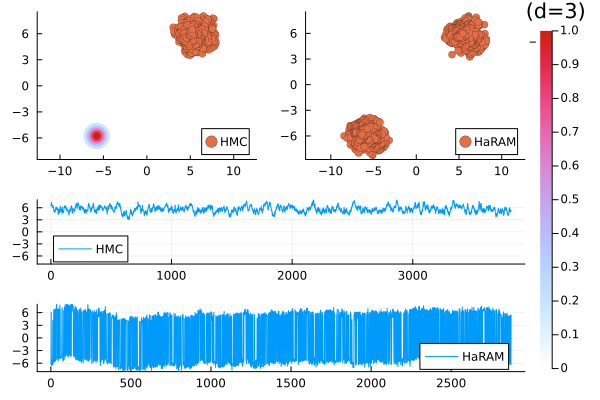

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [8]:
make_plot(x_hmc, x_haram, d, lim)

---
### Example 2: $\mathbb R^{10}$

In [9]:
d, lim = 10, (-6, 6)

(10, (-6, 6))

In [10]:
@time s, a  = mcmc(
    DualAverage(λ=10, δ=0.65),
    HMC(),
    model(d); n=5000, n_burn=1000
)
x_hmc = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
  HMC:  0.9650069986002799


Acceptance Ratio = 0.9625
  6.039456 seconds (13.14 M allocations: 1.344 GiB, 7.72% gc time, 15.13% compilation time)


In [11]:
@time s, a  = mcmc(
    DualAverage(λ=10, δ=0.65),
    HaRAM(),
    model(d); n=5000, n_burn=1000
)
x_haram = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
  HaRAM:  0.6800639872025595


Acceptance Ratio = 0.6819
  7.136557 seconds (16.42 M allocations: 1.814 GiB, 8.50% gc time)


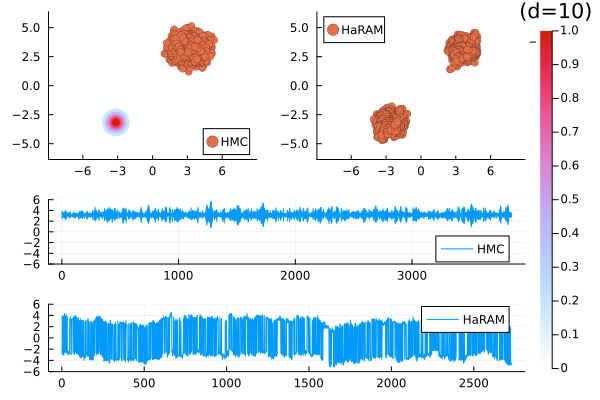

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [12]:
make_plot(x_hmc, x_haram, d, lim)

-----
### Example 3: $\mathbb R^{50}$

In [13]:
d, lim = 50, (-3, 3)

(50, (-3, 3))

In [14]:
@time s, a  = mcmc(
    DualAverage(λ=20, δ=0.65),
    HMC(),
    model(d); n=5000, n_burn=1000
)
x_hmc = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:43
  HMC:  0.8512297540491902


Acceptance Ratio = 0.8531
 43.309360 seconds (41.60 M allocations: 47.601 GiB, 11.93% gc time, 2.41% compilation time)


In [15]:
@time s, a  = mcmc(
    DualAverage(λ=20, δ=0.65),
    HaRAM(),
    model(d); n=5000, n_burn=1000
)
x_haram = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:02:15
  HaRAM:  0.8558288342331534


Acceptance Ratio = 0.8611
135.456145 seconds (126.03 M allocations: 148.439 GiB, 11.98% gc time)


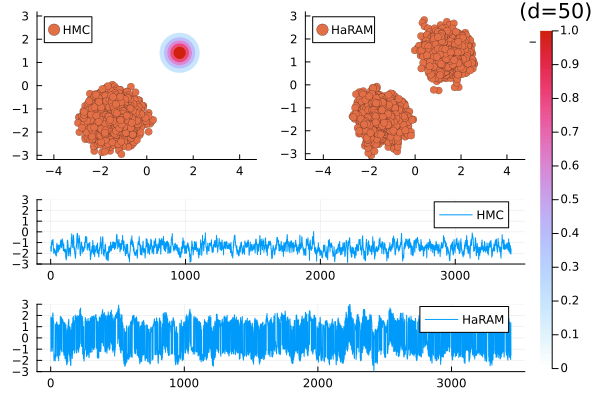

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [16]:
make_plot(x_hmc, x_haram, d, lim)

-----
### Example 4: $\mathbb R^{100}$

In [17]:
d, lim = 100, (-2, 2)

(100, (-2, 2))

In [18]:
@time s, a  = mcmc(
    DualAverage(λ=30, δ=0.55),
    HMC(),
    model(d); n=5000, n_burn=100
)
x_hmc = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
  HMC:  0.3007398520295941


Acceptance Ratio = 0.298
 86.463343 seconds (45.48 M allocations: 140.262 GiB, 13.34% gc time)


In [19]:
@time s, a  = mcmc(
    DualAverage(λ=30, δ=0.5),
    HaRAM(),
    model(d); n=5000, n_burn=100
)
x_haram = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:05:11
  HaRAM:  0.4959008198360328


Acceptance Ratio = 0.4961
311.468511 seconds (180.83 M allocations: 554.989 GiB, 11.94% gc time)


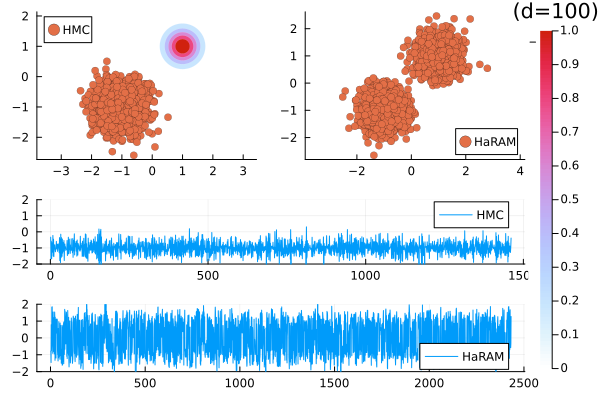

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [20]:
make_plot(x_hmc, x_haram, d, lim)